In [1]:
import ensaio
import xarray as xr

fname = ensaio.fetch_earth_gravity(version=1)
gravity = xr.load_dataarray(fname)
print(gravity)

<xarray.DataArray 'gravity' (latitude: 1081, longitude: 2161)> Size: 19MB
array([[980106.525, 980106.525, 980106.525, ..., 980106.525, 980106.525,
        980106.525],
       [980108.225, 980108.225, 980108.225, ..., 980108.225, 980108.225,
        980108.225],
       [980108.825, 980108.825, 980108.825, ..., 980108.725, 980108.725,
        980108.825],
       ...,
       [980153.825, 980153.725, 980153.625, ..., 980153.925, 980153.825,
        980153.825],
       [980160.425, 980160.425, 980160.425, ..., 980160.425, 980160.425,
        980160.425],
       [980157.525, 980157.525, 980157.525, ..., 980157.525, 980157.525,
        980157.525]], shape=(1081, 2161))
Coordinates:
  * latitude   (latitude) float64 9kB -90.0 -89.83 -89.67 ... 89.67 89.83 90.0
  * longitude  (longitude) float64 17kB -180.0 -179.8 -179.7 ... 179.8 180.0
    height     (latitude, longitude) float32 9MB 1e+04 1e+04 ... 1e+04 1e+04
Attributes:
    Conventions:     CF-1.8
    title:           Gravity acceleration (

In [2]:
 import pygmt

 # Needed so that displaying works on jupyter-sphinx and sphinx-gallery at
 # the same time. Using PYGMT_USE_EXTERNAL_DISPLAY="false" in the Makefile
 # for sphinx-gallery to work means that fig.show won't display anything here
 # either.
 pygmt.set_display(method="notebook")

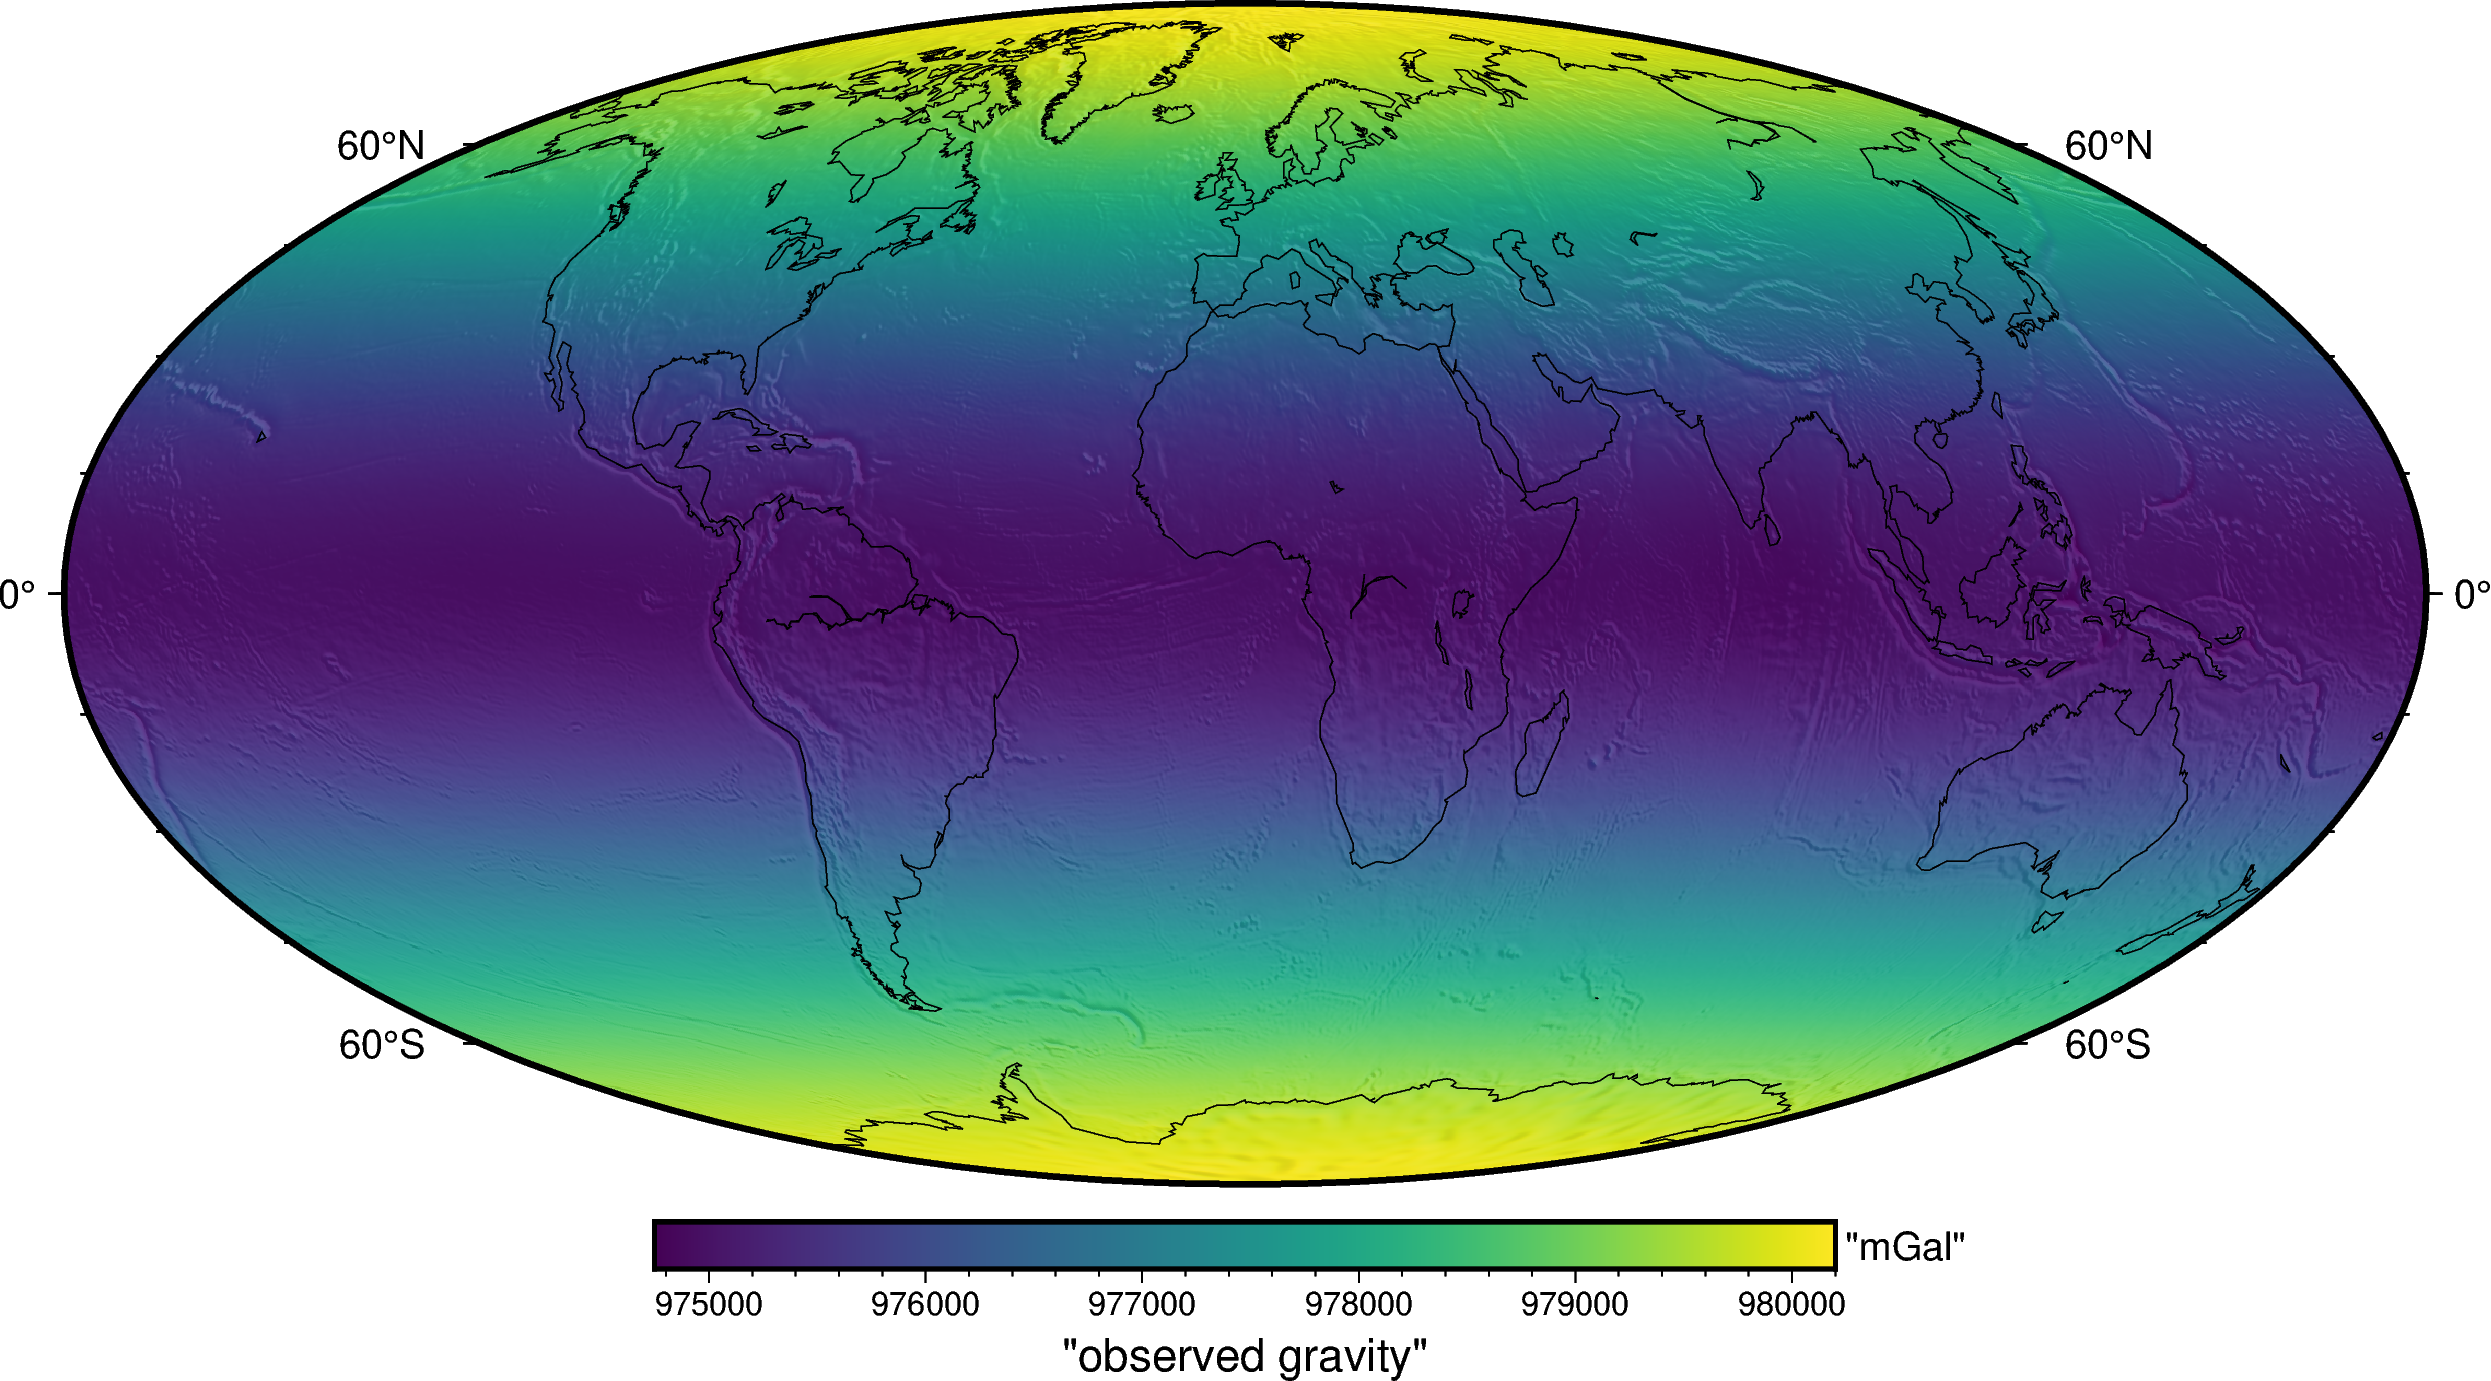

In [3]:
import pygmt

fig = pygmt.Figure()
fig.grdimage(
    gravity,
    projection="W20c",
    cmap="viridis",
    shading="+a45+nt0.2",
)
fig.basemap(frame=["af", "WEsn"])
fig.colorbar(
    position="JCB+w10c",
    frame=["af", 'y+l"mGal"', 'x+l"observed gravity"'],
)
fig.coast(shorelines=True, resolution="c", area_thresh=1e4)
fig.show()

In [4]:
import boule as bl

ellipsoid = bl.WGS84
normal_gravity = ellipsoid.normal_gravity(gravity.latitude, gravity.height)

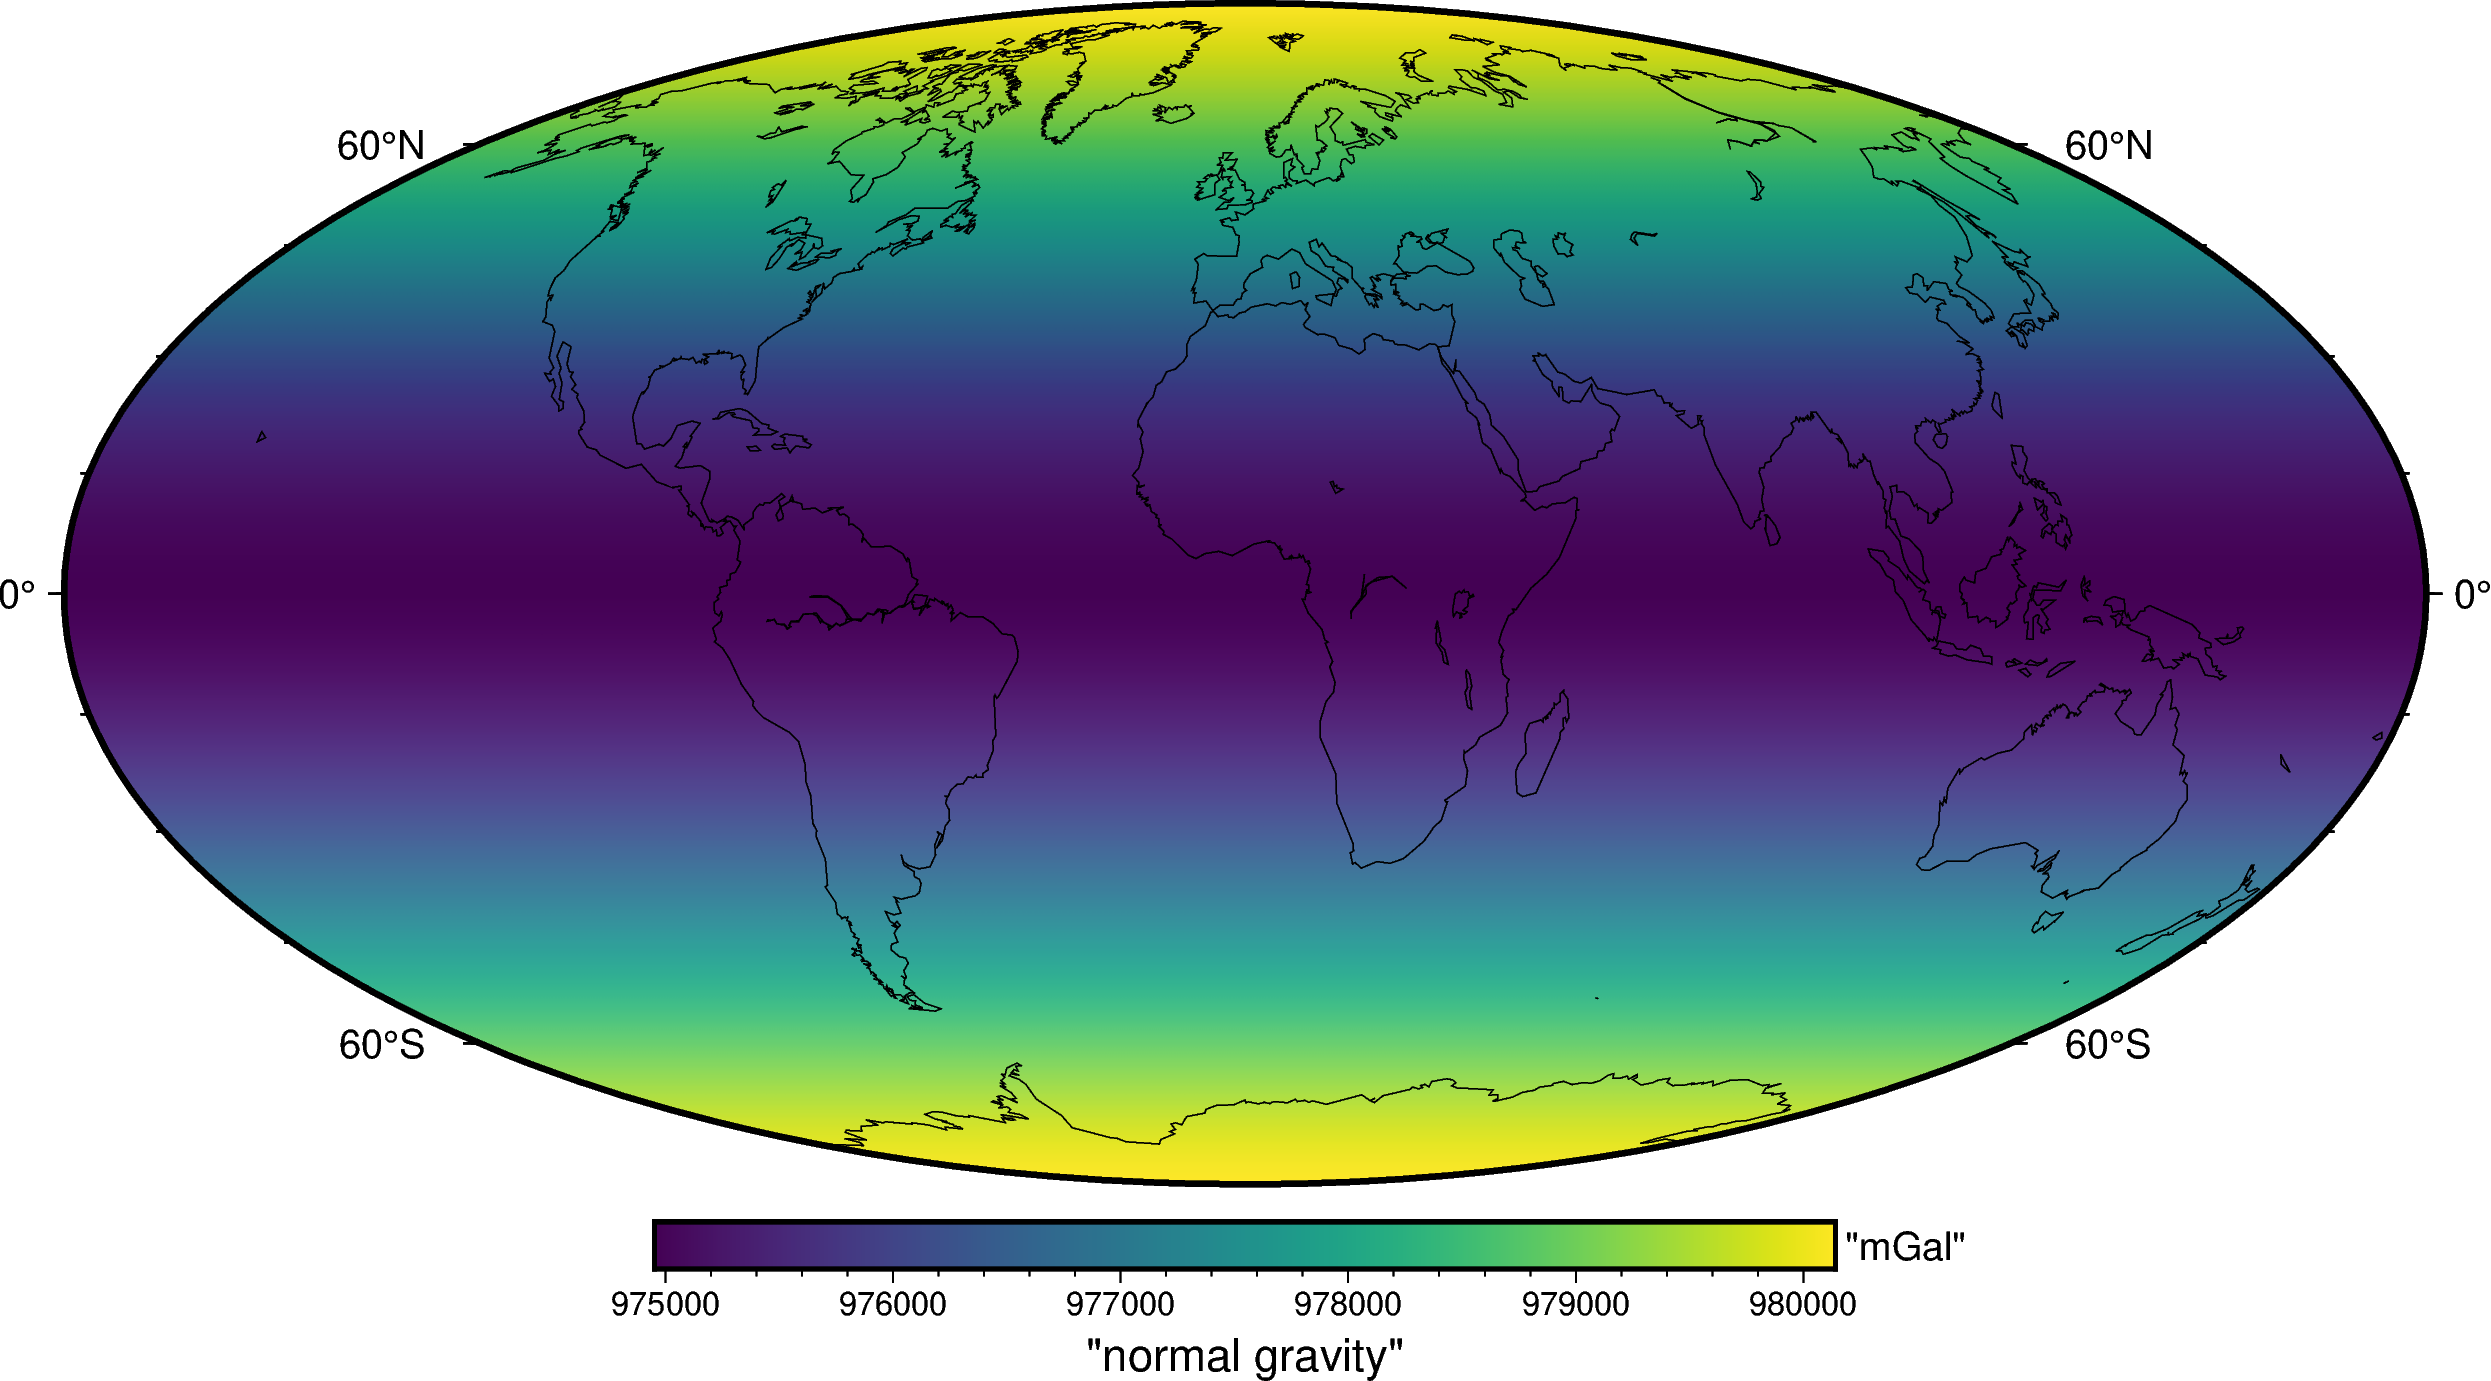

In [5]:
fig = pygmt.Figure()
fig.grdimage(
    normal_gravity,
    projection="W20c",
    cmap="viridis",
    shading="+a45+nt0.2",
)
fig.basemap(frame=["af", "WEsn"])
fig.colorbar(
    position="JCB+w10c",
    frame=["af", 'y+l"mGal"', 'x+l"normal gravity"'],
)
fig.coast(shorelines=True, resolution="c", area_thresh=1e4)
fig.show()

In [6]:
gravity_disturbance = gravity - normal_gravity
print(gravity_disturbance)

<xarray.DataArray (latitude: 1081, longitude: 2161)> Size: 19MB
array([[-35.81009235, -35.81009235, -35.81009235, ..., -35.81009235,
        -35.81009235, -35.81009235],
       [-34.06597894, -34.06597894, -34.06597894, ..., -34.06597894,
        -34.06597894, -34.06597894],
       [-33.33364042, -33.33364042, -33.33364042, ..., -33.43364042,
        -33.43364042, -33.33364042],
       ...,
       [ 11.66635958,  11.56635958,  11.46635958, ...,  11.76635958,
         11.66635958,  11.66635958],
       [ 18.13402106,  18.13402106,  18.13402106, ...,  18.13402106,
         18.13402106,  18.13402106],
       [ 15.18990765,  15.18990765,  15.18990765, ...,  15.18990765,
         15.18990765,  15.18990765]], shape=(1081, 2161))
Coordinates:
  * latitude   (latitude) float64 9kB -90.0 -89.83 -89.67 ... 89.67 89.83 90.0
  * longitude  (longitude) float64 17kB -180.0 -179.8 -179.7 ... 179.8 180.0
    height     (latitude, longitude) float32 9MB 1e+04 1e+04 ... 1e+04 1e+04


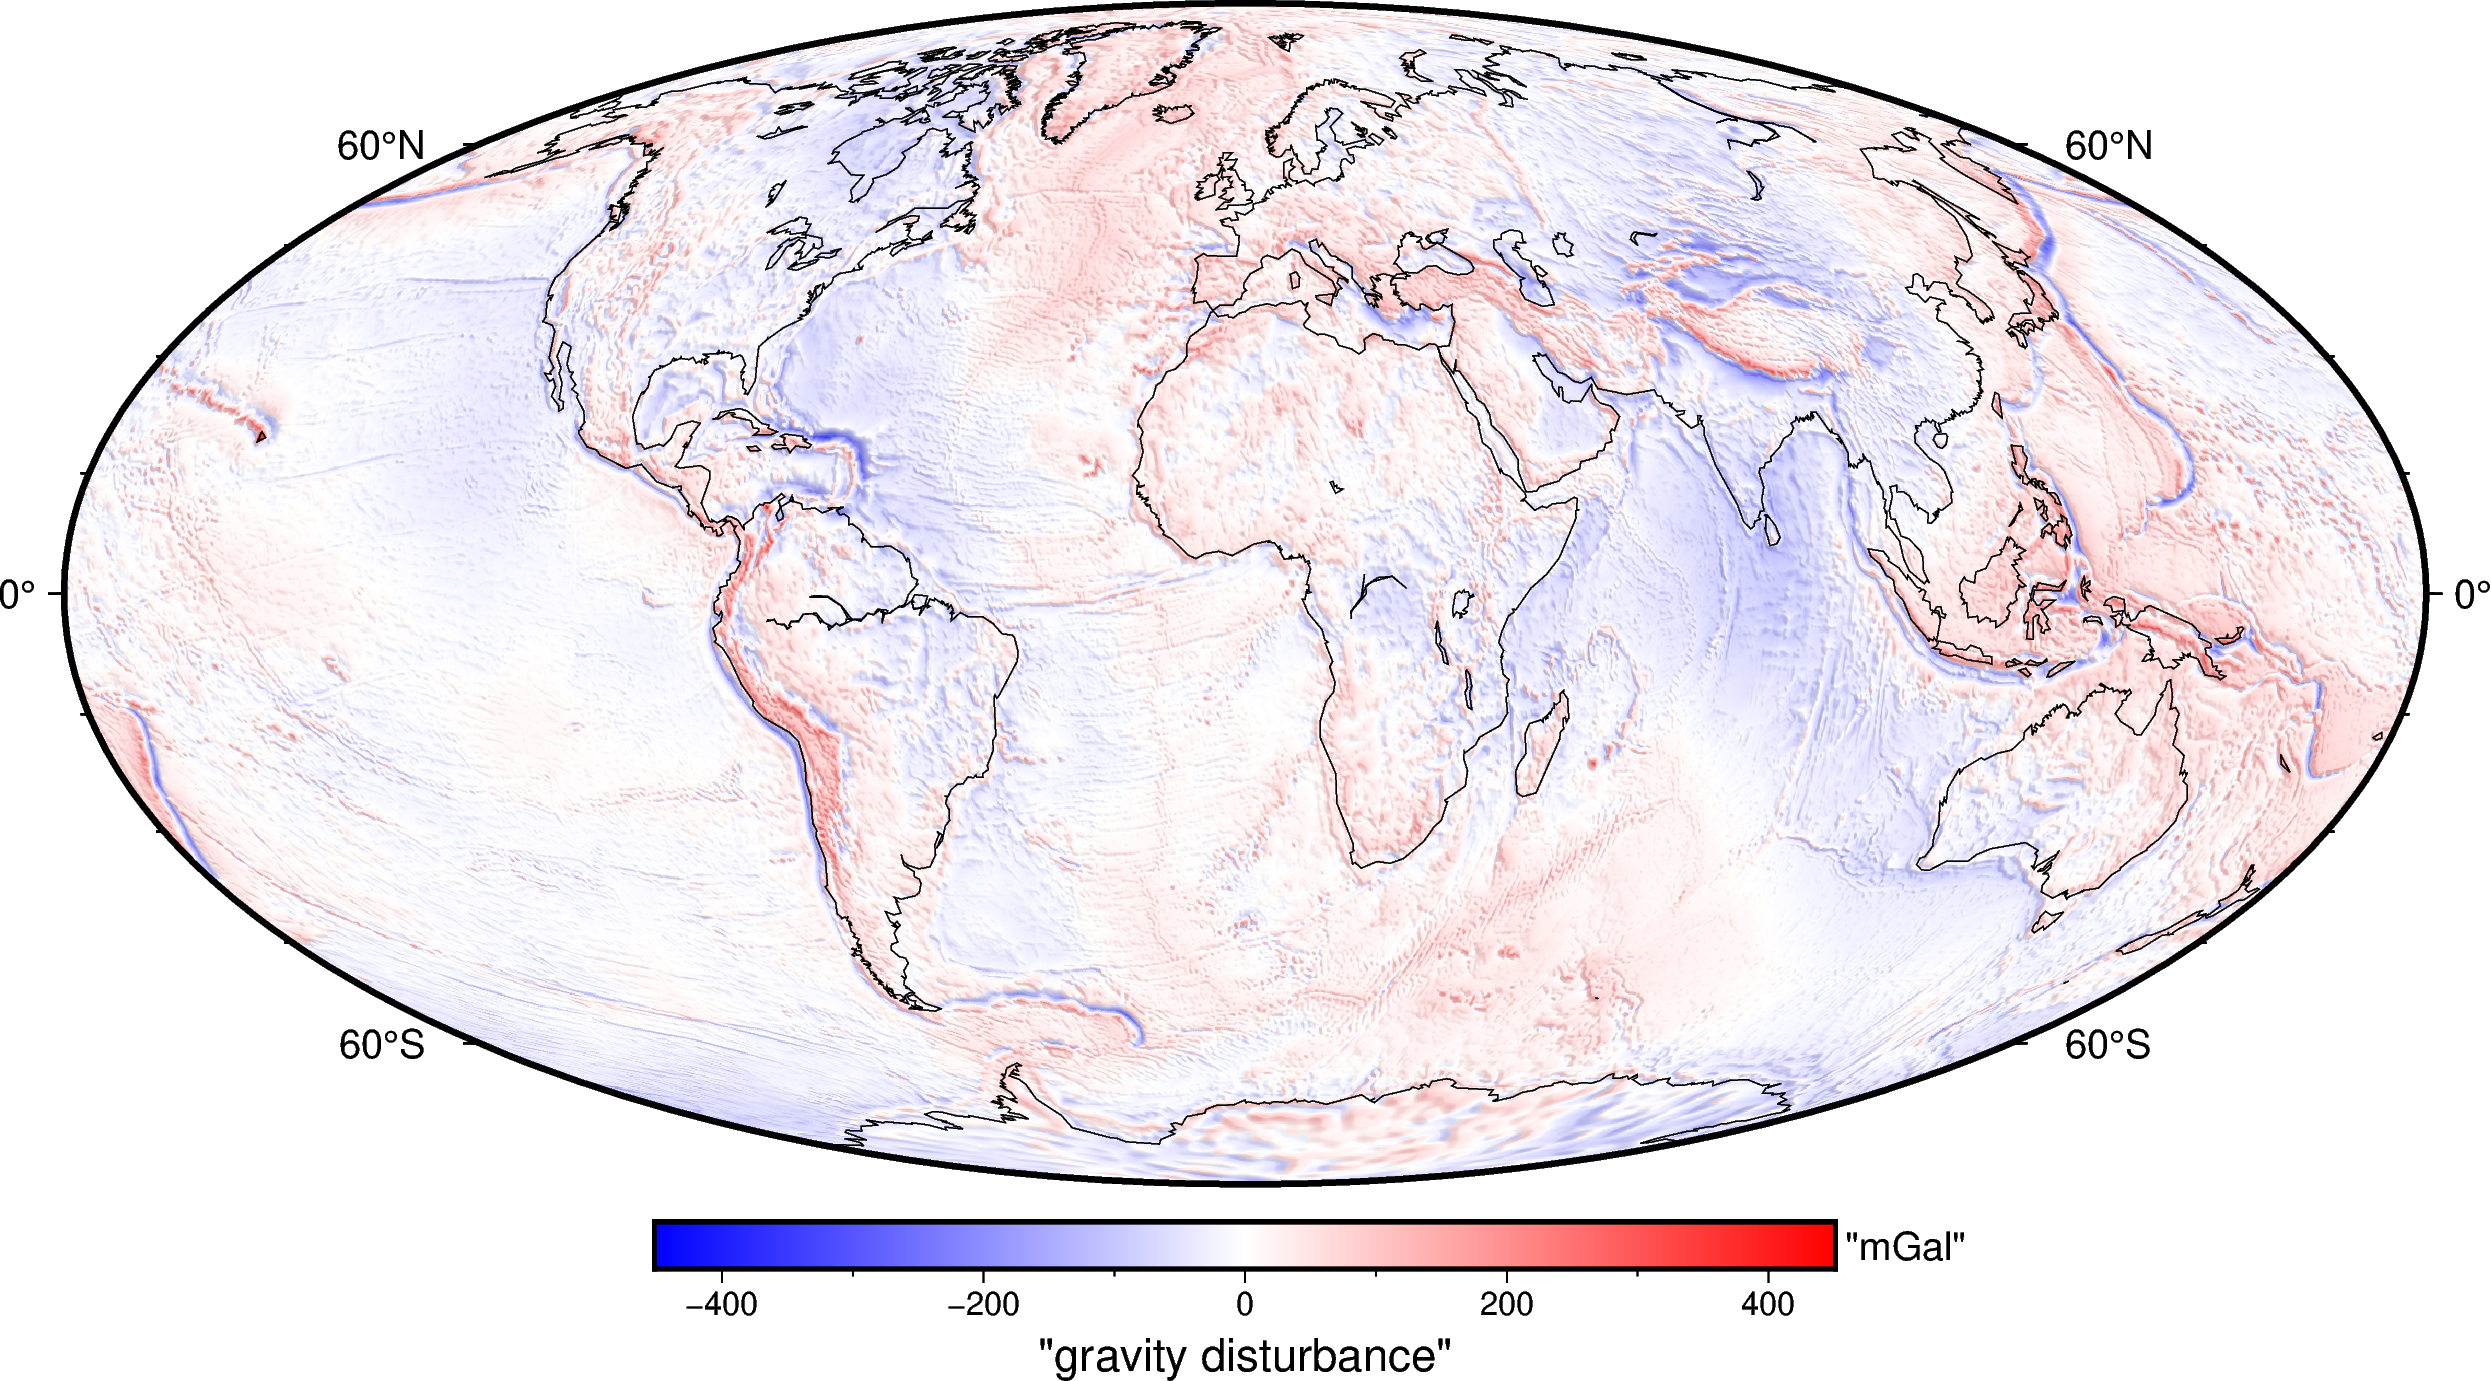

In [7]:
import verde as vd

maxabs = vd.maxabs(gravity_disturbance)

fig = pygmt.Figure()
pygmt.makecpt(series=[-maxabs, maxabs], cmap="polar+h")
fig.grdimage(
    gravity_disturbance,
    projection="W20c",
    cmap=True,
    shading="+a45+nt0.2",
)
fig.basemap(frame=["af", "WEsn"])
fig.colorbar(
    position="JCB+w10c",
    frame=["af", 'y+l"mGal"', 'x+l"gravity disturbance"'],
)
fig.coast(shorelines=True, resolution="c", area_thresh=1e4)
fig.show()